In [2]:
import pandas
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale

In [118]:
data = pandas.read_csv('global_co2.csv')

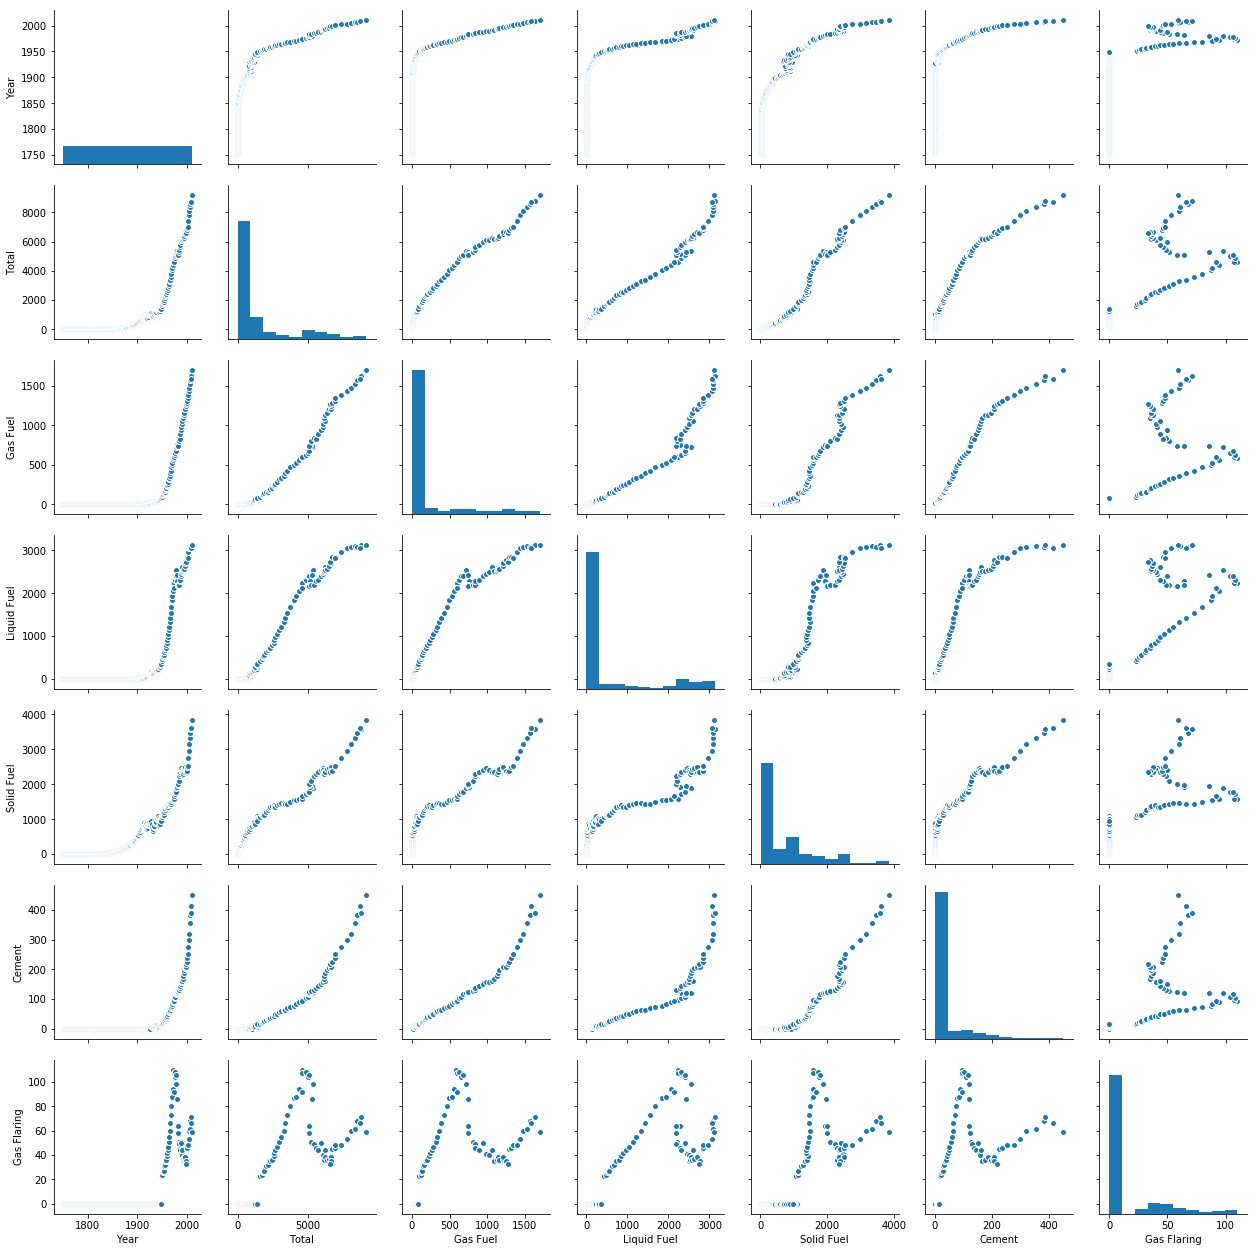

In [119]:
sns_plot = sns.pairplot(data[['Year', 'Total', 'Gas Fuel', 'Liquid Fuel',  'Solid Fuel',  'Cement',  'Gas Flaring']])

In [120]:
X = data.iloc[:,1:6]
y = data.iloc[:, 6]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle = True)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Gas Flaring')

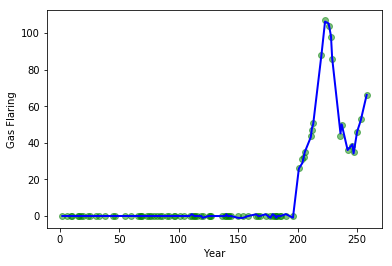

In [124]:
y_test = y_test.sort_index()
X_test = X_test.sort_index()
y_pred = regr.predict(X_test)
plt.scatter(y_test.index, y_test,  color='green', alpha = 0.5)
plt.plot(y_test.index, y_pred, color='blue', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Gas Flaring")

In [122]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
quality = cross_val_score(regr, X, y, cv = kf, scoring='neg_mean_squared_error')
print(quality.mean())

-0.2512501103704105
